In [38]:
import datetime
import os.path
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:
td = pd.read_hdf('../data/processed/store.h5', key='tick_data_dv2_small')
td.head()

,last,volume,dv
date,,,
2018-01-01 17:00:00.087000-05:00,2675.25,680,1819170.00
2018-01-01 17:00:00.097000-05:00,2675.00,9,24075.00
2018-01-01 17:00:00.097000-05:00,2675.00,1,2675.00
2018-01-01 17:00:00.097000-05:00,2675.25,15,40128.75
2018-01-01 17:00:00.097000-05:00,2675.50,10,26755.00


In [3]:
td['dv_cum'] = td['dv'].cumsum()
td['group'] = 0
td = td.reset_index()
td.head()

,date,last,volume,dv,dv_cum,group
0,2018-01-01 17:00:00.087000-05:00,2675.25,680,1819170.00,1819170.00,0
1,2018-01-01 17:00:00.097000-05:00,2675.00,9,24075.00,1843245.00,0
2,2018-01-01 17:00:00.097000-05:00,2675.00,1,2675.00,1845920.00,0
3,2018-01-01 17:00:00.097000-05:00,2675.25,15,40128.75,1886048.75,0
4,2018-01-01 17:00:00.097000-05:00,2675.50,10,26755.00,1912803.75,0


In [4]:
units = 35638840
units = 20000000
threshold = units
g_count = 0

for i in td.index:
    if td.at[i, 'dv_cum'] < threshold:
        td.at[i, 'group'] = g_count
    else:
        threshold = threshold + units
        g_count += 1
        td.at[i, 'group'] = g_count

In [16]:
td

,date,last,volume,dv,dv_cum,group
0,2018-01-01 17:00:00.087000-05:00,2675.25,680,1819170.00,1.819170e+06,0
1,2018-01-01 17:00:00.097000-05:00,2675.00,9,24075.00,1.843245e+06,0
2,2018-01-01 17:00:00.097000-05:00,2675.00,1,2675.00,1.845920e+06,0
3,2018-01-01 17:00:00.097000-05:00,2675.25,15,40128.75,1.886049e+06,0
4,2018-01-01 17:00:00.097000-05:00,2675.50,10,26755.00,1.912804e+06,0
5,2018-01-01 17:00:00.097000-05:00,2675.50,1,2675.50,1.915479e+06,0
6,2018-01-01 17:00:00.097000-05:00,2675.50,1,2675.50,1.918155e+06,0
7,2018-01-01 17:00:00.097000-05:00,2675.25,2,5350.50,1.923505e+06,0
8,2018-01-01 17:00:00.124000-05:00,2675.00,1,2675.00,1.926180e+06,0
9,2018-01-01 17:00:00.124000-05:00,2675.00,1,2675.00,1.928855e+06,0


In [72]:
date = td[['date','group']].groupby('group')['date'].last()
ohlc = td[['last','group']].astype(float).groupby('group')['last'].ohlc()
volume = td[['volume','group']].astype(float).groupby('group')['volume'].sum()
vwap = td[['dv','group']].astype(float).groupby('group')['dv'].sum() / volume

bars = pd.concat([date, ohlc, volume, vwap], axis=1)
bars.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'vwap']

# Timezone isn't correct -- so we have to change
bars['date'] = bars['date'].dt.tz_localize(None)
bars['date'] = bars['date'].dt.tz_localize('America/Chicago').dt.tz_convert('US/Eastern')
bars['date'] = bars['date'].dt.tz_localize(None)

# Add ema of vwap
bars['vwap20'] = bars['vwap'].ewm(span=20, min_periods=20).mean()

In [77]:
fil = np.datetime64('2018-01-03')
day_bars = bars[(bars['date'] > '2018-01-09') & (bars['date'] < '2018-01-10')]
day_bars

,date,open,high,low,close,volume,vwap,vwap20
group,,,,,,,,
705,2018-01-09 02:44:35.581,2745.75,2747.75,2745.50,2747.50,7230.0,2746.865111,2746.153877
706,2018-01-09 03:26:20.942,2747.50,2748.50,2747.25,2748.25,7274.0,2747.871838,2746.317493
707,2018-01-09 04:01:04.735,2748.25,2749.00,2747.75,2748.25,7240.0,2748.495166,2746.524890
708,2018-01-09 04:37:45.473,2748.25,2749.00,2747.75,2748.75,7129.0,2748.202132,2746.684627
709,2018-01-09 05:33:18.293,2748.75,2749.00,2747.25,2747.75,7232.0,2748.239560,2746.832716
710,2018-01-09 06:12:36.201,2747.75,2748.25,2746.50,2747.75,7406.0,2747.520085,2746.898180
711,2018-01-09 06:58:01.092,2747.75,2748.75,2747.50,2748.00,7198.0,2748.229091,2747.024933
712,2018-01-09 07:28:47.465,2748.00,2749.25,2747.75,2748.50,7269.0,2748.581373,2747.173166
713,2018-01-09 08:12:49.523,2748.50,2750.25,2748.25,2750.00,7261.0,2749.310322,2747.376705


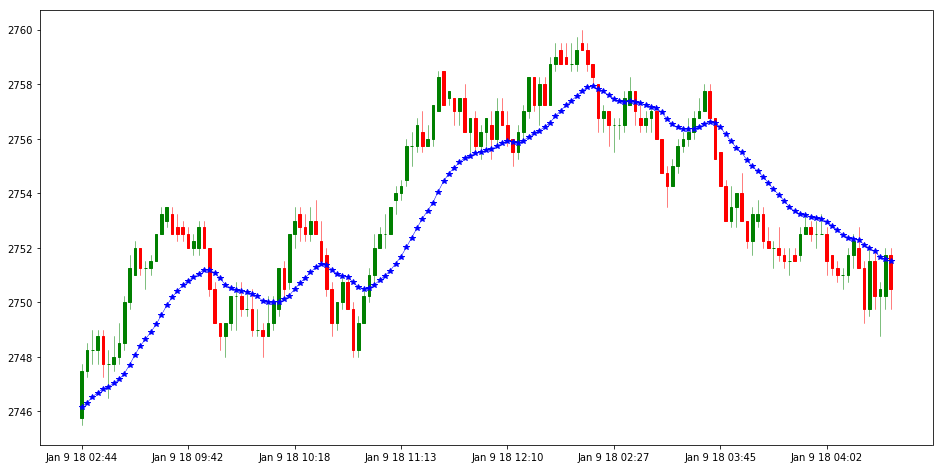

In [78]:
day_bars = day_bars.reset_index(drop=True)
day_bars['x'] = day_bars.index

fig, ax = plt.subplots(figsize=(16,8))
def format_hour(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, len(day_bars.index) - 1)
    return day_bars['date'][thisind].strftime('%b %-d %y %I:%M')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_hour))


subset = day_bars[['x','open','high','low','close']]
tuples = [tuple(x) for x in subset.values]
_ = candlestick_ohlc(ax, tuples, width=.5, colorup='g', colordown='r', alpha=1)
_ = ax.plot(day_bars['x'].tolist(), day_bars['vwap20'].tolist(), color='blue', lw=0.5, marker='*') #plot vwap


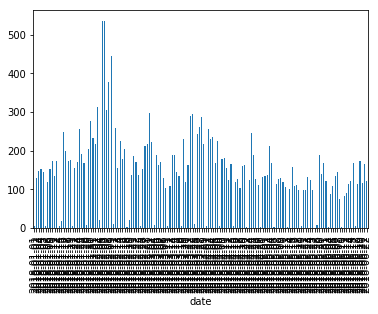

In [56]:
bars['date'].groupby(bars['date'].dt.date).count().plot(kind='bar')

In [57]:
day_bars.shape

(249, 8)

In [58]:
bars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21388 entries, 0 to 21387
Data columns (total 7 columns):
date      21388 non-null datetime64[ns]
open      21388 non-null float64
high      21388 non-null float64
low       21388 non-null float64
close     21388 non-null float64
volume    21388 non-null float64
vwap      21388 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.9 MB
